# **Evaluating a model**

In [1]:
TEST_SET_FEATURES = "../01_data/test/well_educated_features.csv"
TEST_SET_LABELS = "../01_data/test/well_educated_labels.csv"

MODEL_NAME = "well_educated"

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import neural_network

## **Loading Test Data**

In [3]:
X = np.loadtxt(TEST_SET_FEATURES, delimiter=",")
y = np.loadtxt(TEST_SET_LABELS, delimiter=",").reshape((len(X), 1))

## **Loading the Model**

In [4]:
model = neural_network.create_model(X)

model.load_weights("../03_models/"+MODEL_NAME+"/")

2022-11-19 23:22:34.979583: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-19 23:22:35.496643: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1621 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 860M, pci bus id: 0000:01:00.0, compute capability: 5.0


## **Inference**

In [5]:
predictions = model.predict(X)

32/32 [==============================] - 0s 1ms/step


## **Evaluation**

In [6]:
def rescale_labels(original_labels, scaled_labels):
    #m = np.mean(original_labels)
    #s = np.std(original_labels)
    #return scaled_labels*s+m
    return scaled_labels*max(original_labels)

In [7]:
original_labels = pd.read_csv("../01_data/adult_reconstruction.csv")
original_labels = original_labels["income"]

In [8]:
rms = np.sqrt((y-predictions)**2)

In [9]:
rescaled_rms = rescale_labels(original_labels, rms)

(array([110., 100.,  85.,  99.,  76.,  63.,  74.,  53.,  58.,  42.,  29.,
         35.,  27.,  32.,  19.,  16.,  17.,  15.,  14.,  13.,   6.,   7.,
          7.,   2.,   2.,   0.,   2.,   0.,   2.,   1.]),
 array([2.21316617e+01, 2.07437094e+03, 4.12661021e+03, 6.17884949e+03,
        8.23108876e+03, 1.02833280e+04, 1.23355673e+04, 1.43878066e+04,
        1.64400459e+04, 1.84922851e+04, 2.05445244e+04, 2.25967637e+04,
        2.46490030e+04, 2.67012422e+04, 2.87534815e+04, 3.08057208e+04,
        3.28579601e+04, 3.49101993e+04, 3.69624386e+04, 3.90146779e+04,
        4.10669172e+04, 4.31191564e+04, 4.51713957e+04, 4.72236350e+04,
        4.92758743e+04, 5.13281136e+04, 5.33803528e+04, 5.54325921e+04,
        5.74848314e+04, 5.95370707e+04, 6.15893099e+04]),
 <BarContainer object of 30 artists>)

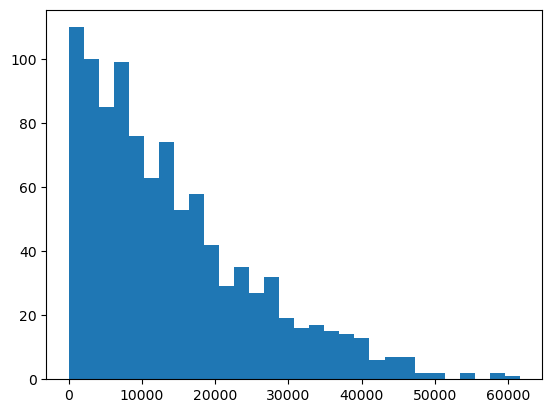

In [10]:
plt.hist(rescaled_rms, bins=30)

(array([ 1.,  3., 14., 18., 12., 12.,  8., 21., 26., 29., 26., 22., 25.,
        33., 28., 35., 32., 41., 40., 34., 32., 23., 22., 26., 21., 21.,
        34., 21., 35., 25., 37., 38., 51., 42., 27., 20., 14.,  7.,  4.,
         7.,  2.,  6.,  9.,  5.,  2.,  9.,  2.,  1.,  1.,  2.]),
 array([  151.26343426,  2020.45140355,  3889.63937284,  5758.82734213,
         7628.01531143,  9497.20328072, 11366.39125001, 13235.5792193 ,
        15104.76718859, 16973.95515789, 18843.14312718, 20712.33109647,
        22581.51906576, 24450.70703505, 26319.89500434, 28189.08297364,
        30058.27094293, 31927.45891222, 33796.64688151, 35665.8348508 ,
        37535.0228201 , 39404.21078939, 41273.39875868, 43142.58672797,
        45011.77469726, 46880.96266655, 48750.15063585, 50619.33860514,
        52488.52657443, 54357.71454372, 56226.90251301, 58096.09048231,
        59965.2784516 , 61834.46642089, 63703.65439018, 65572.84235947,
        67442.03032877, 69311.21829806, 71180.40626735, 73049.594236

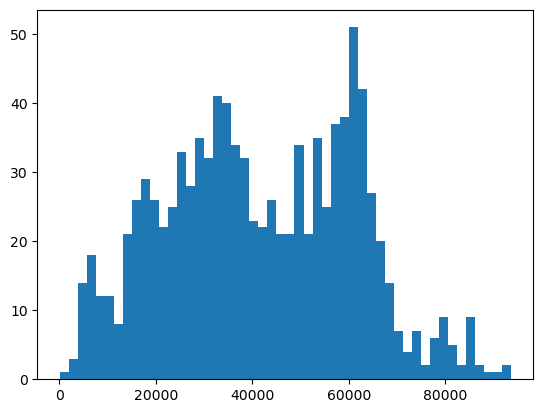

In [11]:
plt.hist(rescale_labels(original_labels, predictions), bins=50)

In [12]:
np.mean(rescaled_rms)

14190.110531667791